In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
smart_grid_aug = pd.read_csv("input/UCI_smart_grid_stability_augmented.csv")

smart_grid_aug.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


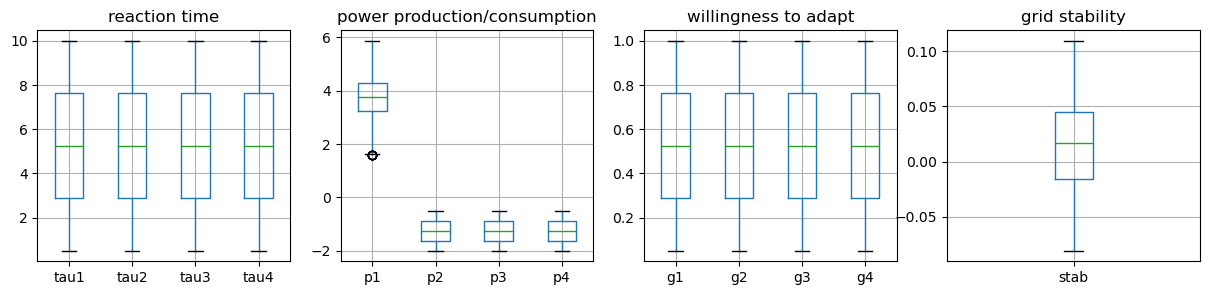

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

for axs_ind, feature_group in enumerate(["tau", "p", "g"]):
    smart_grid_aug.boxplot(
        column=[feature_group + str(i + 1) for i in range(4)], 
        ax= axs[axs_ind]
    )
smart_grid_aug.boxplot(column="stab", ax= axs[3])

for axs_ind, title in enumerate(["reaction time", "power production/consumption",
                                 "willingness to adapt", "grid stability"]):
    axs[axs_ind].set(title=title);

In [4]:
print(smart_grid_aug["stabf"].value_counts(normalize=True))

unstable    0.638
stable      0.362
Name: stabf, dtype: float64


In [5]:
smart_grid = smart_grid_aug.assign(stabf = lambda x: x.stabf.replace({"unstable": 0, "stable": 1}))

smart_grid.columns = (smart_grid.columns
                      .str.replace("tau", "delay")
                      .str.replace("p", "power")
                      .str.replace("g", "adapt"))

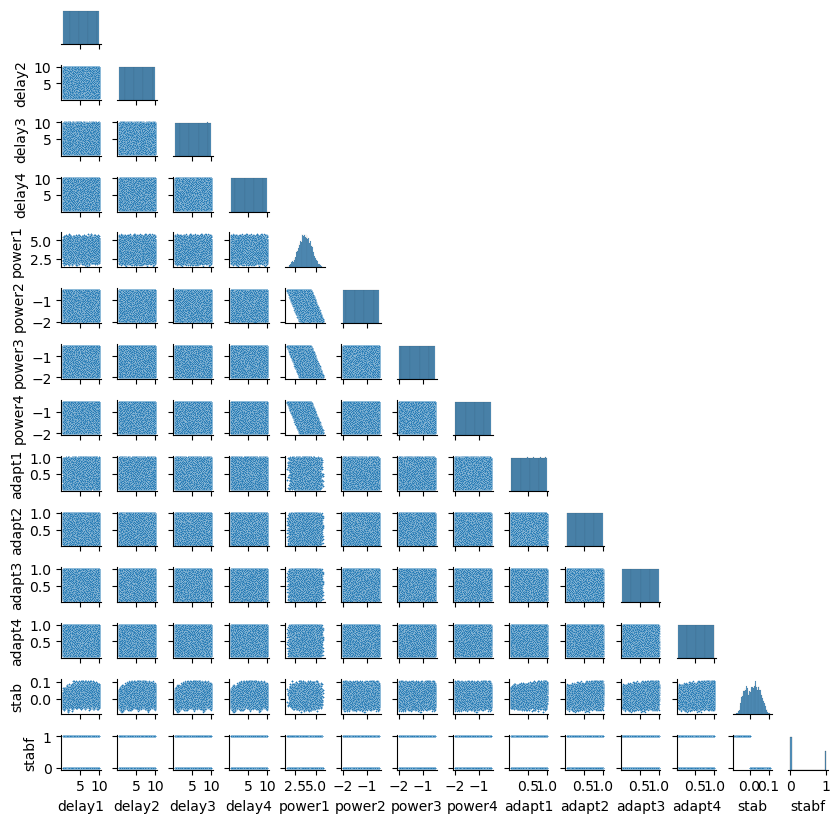

In [6]:
g = sns.PairGrid(smart_grid, diag_sharey=False,
                 corner=True, height=0.6, aspect=1)
g.map_lower(sns.scatterplot, s=1)
g.map_diag(sns.histplot);

<AxesSubplot:>

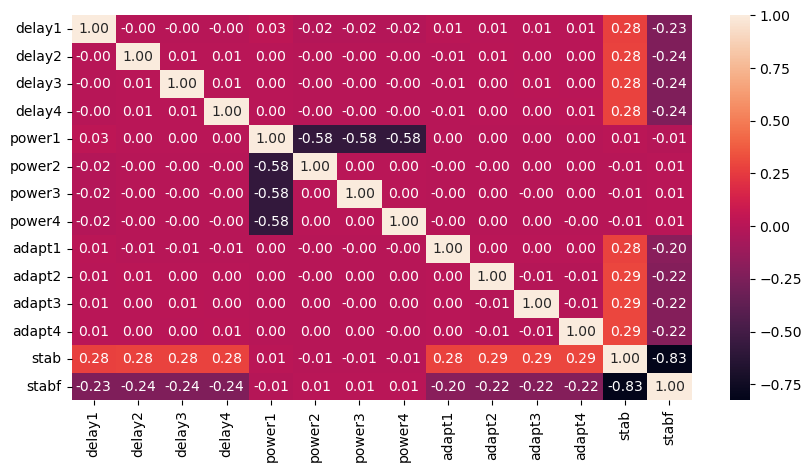

In [7]:
plt.figure(figsize = (10, 5))
sns.heatmap(smart_grid.corr(), fmt=".2f", annot=True)

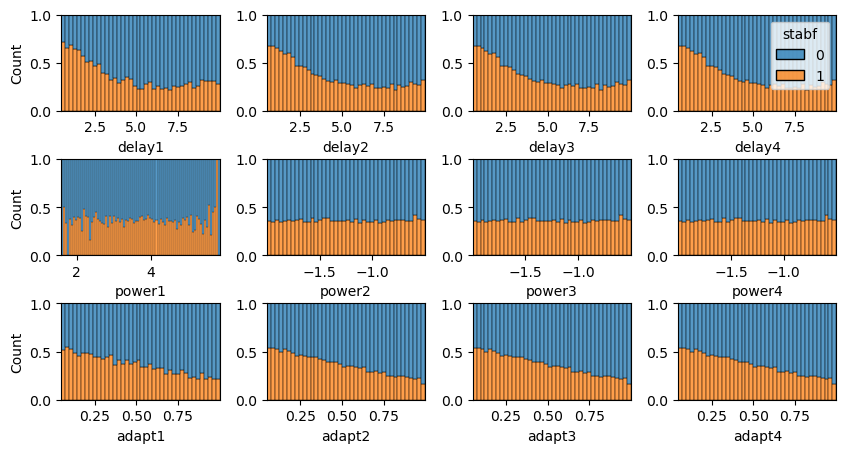

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(10, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for row_ind, feat_type in enumerate(["delay", "power", "adapt"]):
    for col_ind in range(4):
        show_legend = True if (row_ind == 0) & (col_ind == 3) else False
        sns.histplot(
            smart_grid, x=feat_type + str(col_ind + 1), hue="stabf",
            multiple="fill", legend=show_legend,
            ax=axs[row_ind, col_ind]
        )
        
        if col_ind > 0:
            axs[row_ind, col_ind].set_ylabel("")



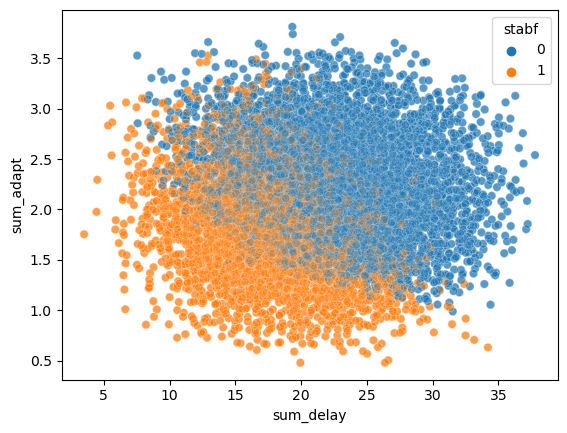

In [9]:
(smart_grid
 .assign(
     sum_delay = lambda x: x["delay1"] + x["delay2"] + x["delay3"] + x["delay4"],
     sum_adapt = lambda x: x["adapt1"] + x["adapt2"] + x["adapt3"] + x["adapt4"]
 )
 .pipe((sns.scatterplot, "data"), 
       x="sum_delay", y="sum_adapt", hue="stabf", alpha=0.2)
);